# Trained model summary

This notebook contains a summary over all trained CNNs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os

main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

In [131]:
models = []
for folder in os.listdir(main_path):
    data = []
    name =  folder.split('_')[-1]
    data.append(name)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    data.extend(df[df['Auc']==df['Auc'].max()].values.tolist()[0])
    
    modified_time = int(os.stat(path).st_mtime)
    date = time.localtime(modified_time)[0:6]
    data.extend(date)
    models.append(data)
    
df = pd.DataFrame(models, columns=['Name', 'Learning_Rate', 'Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes', 'Accuracy', 'Auc', 'Steps', 'Early_Stopped', 'Time', 'Title', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'])
df = df[['Name', 'Auc', 'Accuracy', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Learning_Rate', 'Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes', 'Steps', 'Early_Stopped', 'Time', 'Title']].sort_values(by='Auc', ascending=False)


df

,Name,Auc,Accuracy,Year,Month,Day,Hour,Minute,Second,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Steps,Early_Stopped,Time,Title
1,cccff,0.953443,90.600008,2017,6,25,10,32,2,0.001,169,5,9,32,50000,False,489.509731,Optimizing
7,cccf,0.952376,90.550005,2017,6,25,19,56,8,0.001,180,3,9,138,50000,False,672.932741,Random_Plotting
8,ccccf,0.951235,90.370017,2017,6,25,13,30,14,0.001,178,3,10,208,50000,False,462.173625,Random_Plotting
5,cccccff,0.950604,90.590006,2017,6,25,20,7,53,0.001,135,5,8,157,50000,False,1287.778864,Random_Plotting
9,cccccf,0.949882,90.690017,2017,6,25,20,4,45,0.001,166,3,8,202,50000,False,690.395214,Random_Plotting
0,ccccff,0.949312,89.420003,2017,6,25,16,39,2,0.001,244,3,8,124,47000,True,916.823063,Random_Plotting
2,ccff,0.949224,89.640009,2017,6,24,14,57,19,0.001,256,3,14,12,50000,False,1866.986505,Optimizing
6,ccf,0.938135,89.510006,2017,6,25,2,33,2,0.001,246,5,13,0,50000,False,1043.125297,Random_Plotting
3,cff,0.921552,88.130009,2017,6,23,3,45,53,0.001,256,5,9,64,50000,False,1623.929747,Optimizing
4,cf,0.888994,86.710000,2017,6,23,12,53,32,0.001,215,5,25,0,50000,False,827.554981,Random_Plotting


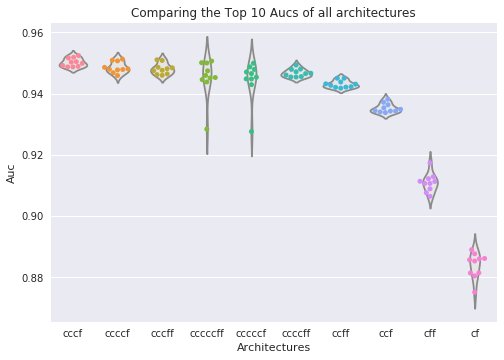

In [150]:
plot_auc = []
names = []
for folder in os.listdir(main_path):
    name =  folder.split('_')[-1]
    names.append(name)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    plot_auc.append(df[df['Title']=='Random_Plotting'].sort_values(by='Auc', ascending=False).head(10)['Auc'].values.tolist())
    
df_plot = pd.DataFrame(np.array(plot_auc).T, columns=names)
df_plot = df_plot[df_plot.max().sort_values(ascending=False).index]

import seaborn as sns
df_swarm = pd.melt(df_plot)
df_swarm.columns = ['Architectures', 'Auc']
sns.set(style='darkgrid', font='DejaVu Sans')
plt.title('Comparing the Top 10 Aucs of all architectures')
sns.violinplot(x="Architectures", y="Auc", data=df_swarm, inner=None, color=".9")
sns.swarmplot(x="Architectures", y="Auc", data=df_swarm)
plt.show()

In [148]:
main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'
for name in os.listdir(main_path):
    model_name = name.split('_')[-1]
    df = pd.read_csv(os.path.join(main_path, name, model_name+'_Hyperparameter.csv'))
    print(name, df[df['Title']=='Random_Plotting'].shape)

7_ccccff (50, 11)
3_cccff (50, 11)
1_ccff (50, 11)
2_cff (50, 11)
4_cf (50, 11)
10_cccccff (30, 11)
5_ccf (50, 11)
6_cccf (50, 11)
8_ccccf (50, 11)
9_cccccf (25, 11)


In [149]:
main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'
folder = ['cccf', 'ccccf', 'cccff']
for name in [path for path in os.listdir(main_path) if path.split('_')[-1] in folder]:
    model_name = name.split('_')[-1]
    df = pd.read_csv(os.path.join(main_path, name, model_name+'_Hyperparameter.csv'))
    print(name, df[df['Title']=='Optimizing_Run_1'].shape)

3_cccff (0, 11)
6_cccf (33, 11)
8_ccccf (0, 11)


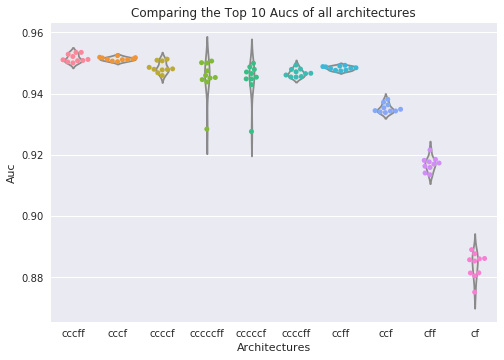

In [151]:
plot_auc = []
names = []
for folder in os.listdir(main_path):
    name =  folder.split('_')[-1]
    names.append(name)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    plot_auc.append(df.sort_values(by='Auc', ascending=False).head(10)['Auc'].values.tolist())
    
df_plot = pd.DataFrame(np.array(plot_auc).T, columns=names)
df_plot = df_plot[df_plot.max().sort_values(ascending=False).index]

import seaborn as sns
df_swarm = pd.melt(df_plot)
df_swarm.columns = ['Architectures', 'Auc']
sns.set(style='darkgrid', font='DejaVu Sans')
plt.title('Comparing the Top 10 Aucs of all architectures')
sns.violinplot(x="Architectures", y="Auc", data=df_swarm, inner=None, color=".9")
sns.swarmplot(x="Architectures", y="Auc", data=df_swarm)
plt.show()